In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Cars93.csv')

In [3]:
len(df)

93

In [4]:
df.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [5]:
df.loc[0,:]

Manufacturer                  Acura
Model                       Integra
Type                          Small
Min.Price                      12.9
Price                          15.9
Max.Price                      18.8
MPG.city                         25
MPG.highway                      31
AirBags                        None
DriveTrain                    Front
Cylinders                         4
EngineSize                      1.8
Horsepower                      140
RPM                            6300
Rev.per.mile                   2890
Man.trans.avail                 Yes
Fuel.tank.capacity             13.2
Passengers                        5
Length                          177
Wheelbase                       102
Width                            68
Turn.circle                      37
Rear.seat.room                 26.5
Luggage.room                     11
Weight                         2705
Origin                      non-USA
Make                  Acura Integra
Name: 0, dtype: object

1. Does car with a bigger ```fuel tank capacity``` necessarily have more ```horsepower```?
2. For a car with ```fuel tank capacity``` of 27 US gallons, what is the maximum ```horsepower``` roughly?
3. What about a car with 9 US gallons of ```fuel tank capacity```?
4. What about a car with 16 gallons of ```fuel tank capacity```?

In [6]:
covariate_colname = ['Min.Price', 
                     'Price', 
                     'Max.Price', 
                     'MPG.city', 
                     'MPG.highway', 
                     'EngineSize', 
                     'RPM', 
                     'Rev.per.mile', 
                     'Fuel.tank.capacity', 
                     'Passengers', 
                     'Length', 
                     'Wheelbase', 
                     'Width',
                     'Turn.circle', 
                     'Weight']
response_colname = ['Horsepower']

In [7]:
len(covariate_colname)

15

In [8]:
x = df[covariate_colname]
y = df[response_colname]

In [9]:
x.shape

(93, 15)

## Split data into train and test

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=10./93, random_state=42)

## Fit a linear model

```['Horsepower'] = b0 + b...*[...] + error```

In [15]:
xtrain.shape

(83, 15)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()
model.fit(xtrain, ytrain)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Do our predictions line up with actual in training?

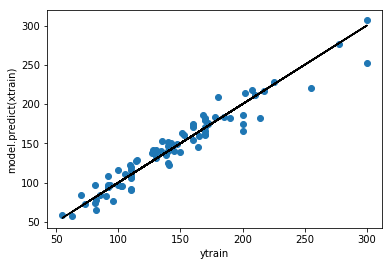

In [14]:
plt.scatter(ytrain, model.predict(xtrain))
plt.plot(ytrain, ytrain, color = 'black')
plt.xlabel('ytrain')
plt.ylabel('model.predict(xtrain)')
plt.show()

## Compare train and test data

### Do our predictions line up with actual in testing?

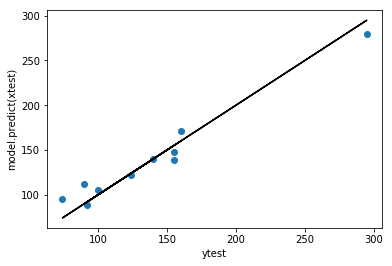

In [16]:
plt.scatter(ytest, model.predict(xtest))
plt.plot(ytest, ytest, color = 'black')
plt.xlabel('ytest')
plt.ylabel('model.predict(xtest)')
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
msetrain = mean_squared_error(model.predict(xtrain), ytrain)
msetest = mean_squared_error(model.predict(xtest), ytest)

print ('msetrain:', msetrain, 'msetest:', msetest)

msetrain: 180.33750237981909 msetest: 162.74575447134956
